### Name: Aayush Kamath <br> UNI: ak4808

### Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## YOUR CODE HERE
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df = pd.read_excel('/content/gdrive/My Drive/ML_Climate/Data/Projected_impacts_datasheet.xlsx')
df.head()

,ID,Ref No,Source,Scale,Crop,Country,Site(location),Region,latitude,longitude,...,Planting time,Tillage,Others,Adaptation,Adaptation type,Reference,doi,Publication year,Note1 \n(* = corrected by HW),Note2 \n(* = Local temperature is estimated )
0,1,1,SCOPUS-NewSearch,Regional,Maize,Pakistan,Punjub,Asia,31.4167,73.0911,...,No,No,No,No,No,"Ahmad et al., 2020",10.1016/j.eja.2020.126040,2020,NaN,NaN
1,2,1,SCOPUS-NewSearch,Regional,Maize,Pakistan,Punjub,Asia,31.4167,73.0911,...,Yes,No,Yes,Yes,Combined,"Ahmad et al., 2020",10.1016/j.eja.2020.126040,2020,NaN,NaN
2,3,2,SCOPUS-NewSearch,Regional,Maize,United States,Wyoming,North America,43.2705,-104.1080,...,No,No,No,No,No,"Burchfield et al., 2020",10.1007/s10584-019-02567-7,2020,NaN,*
3,4,2,SCOPUS-NewSearch,Regional,Maize,United States,Wyoming,North America,43.2705,-104.1080,...,No,No,Yes,Yes,Others,"Burchfield et al., 2020",10.1007/s10584-019-02567-7,2020,NaN,*
4,5,3,SCOPUS-NewSearch,Regional,Maize,China,Hubei,Asia,30.0000,110.0000,...,No,No,No,No,No,"Chen et al., 2020",10.1016/j.agrformet.2019.107867,2020,NaN,NaN


In [4]:
num = [4] + [i for i in range(7,14)] + [i for i in range(15,20)] + [22] + [i for i in range(24,33)]

df_crop = df.iloc[:, num]
df_crop.head()

,Crop,Region,latitude,longitude,Current Average Temperature (℃),Future_Mid-point,Baseline_Mid-point,Time slice,Scenario source,Local delta T,...,Climate impacts per ℃ (%),CO2,CO2 ppm,Fertiliser,Irrigation,Cultivar,Soil organic matter management,Planting time,Tillage,Others
0,Maize,Asia,31.4167,73.0911,25.4543,2054,1995,MC,CMIP5,2.94,...,-6.671298,Yes,564.31311,No,No,No,No,No,No,No
1,Maize,Asia,31.4167,73.0911,25.4543,2054,1995,MC,CMIP5,2.94,...,4.765213,Yes,564.31311,Yes,No,Yes,No,Yes,No,Yes
2,Maize,North America,43.2705,-104.1080,10.1912,2055,1998,MC,CMIP5,NaN,...,-8.868124,Yes,570.51669,No,No,No,No,No,No,No
3,Maize,North America,43.2705,-104.1080,10.1912,2055,1998,MC,CMIP5,NaN,...,9.897460,Yes,570.51669,No,No,No,No,No,No,Yes
4,Maize,Asia,30.0000,110.0000,14.6521,2050,1983,MC,CMIP5,1.15,...,-4.675325,Yes,486.53532,No,No,No,No,No,No,No


In [5]:
df_crop.isnull().sum()

Crop                                             0
Region                                           0
latitude                                        37
longitude                                       37
Current Average Temperature (℃)                 37
Future_Mid-point                                 0
Baseline_Mid-point                               0
Time slice                                       0
Scenario source                                  0
Local delta T                                 4225
Local delta T from 2005                         37
Global delta T from pre-industrial period      518
Global delta T from 2005                       510
Climate impacts per ℃ (%)                        0
CO2                                              0
CO2 ppm                                        209
Fertiliser                                       0
Irrigation                                       0
Cultivar                                         0
Soil organic matter management 

In [6]:
df_crop.columns

Index(['Crop', 'Region', 'latitude', 'longitude',
       'Current Average Temperature (℃)', 'Future_Mid-point',
       'Baseline_Mid-point', 'Time slice', 'Scenario source', 'Local delta T ',
       'Local delta T from 2005', 'Global delta T from pre-industrial period ',
       'Global delta T from 2005', 'Climate impacts per ℃ (%)', 'CO2',
       'CO2 ppm', 'Fertiliser', 'Irrigation', 'Cultivar',
       'Soil organic matter management', 'Planting time', 'Tillage', 'Others'],
      dtype='object')

In [7]:
df_crop=df_crop.drop(columns=['Local delta T ', 'Local delta T from 2005'])
df_crop = df_crop.dropna(subset=['latitude', 'longitude','Current Average Temperature (℃)', 'Global delta T from pre-industrial period ', 'Global delta T from 2005','CO2 ppm'])

In [8]:
df_crop['Cultivar'] = df_crop['Cultivar'].str.strip()
df_crop['Scenario source'] = df_crop['Scenario source'].str.strip()
df_crop['Scenario source'].value_counts()

CMIP5     6766
CMIP3      840
Others     138
Name: Scenario source, dtype: int64

In [9]:
df_crop_cat = pd.get_dummies(df_crop, columns=['CO2','Fertiliser', 'Irrigation','Cultivar','Soil organic matter management','Planting time','Tillage','Others'],drop_first=True)
df_crop_cat['Region'] = df_crop_cat['Region'].replace({'Asia':0, 'Europe':1, 'Africa':2, 'North America':3, 'Central and South America':'4','Australasia':5})
df_crop_cat['Scenario source'] = df_crop_cat['Scenario source'].replace({'CMIP5':0, 'CMIP3':1, 'Others':2})
df_crop_cat['Time slice'] = df_crop_cat['Time slice'].replace({'NF':0, 'MC':1, 'EC':2})


In [10]:
df_crop_maize = df_crop_cat[df_crop_cat.Crop == 'Maize']
df_crop_rice = df_crop_cat[df_crop_cat.Crop == 'Rice']
df_crop_soybean = df_crop_cat[df_crop_cat.Crop == 'Soybean']
df_crop_wheat = df_crop_cat[df_crop_cat.Crop == 'Wheat']

In [11]:
df_crop_maize=df_crop_maize.drop(columns=['Crop'])
df_crop_rice=df_crop_rice.drop(columns=['Crop'])
df_crop_soybean=df_crop_soybean.drop(columns=['Crop'])
df_crop_wheat=df_crop_wheat.drop(columns=['Crop'])

####1. Maize

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg

In [13]:
df_maize_X = df_crop_maize.drop(columns=['Climate impacts per ℃ (%)'])
df_maize_y = df_crop_maize['Climate impacts per ℃ (%)']

In [14]:
X_dev_m, X_test_m, y_dev_m, y_test_m = train_test_split(df_maize_X, df_maize_y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_dev_m = scaler.fit_transform(X_dev_m)   # Fit and transform scalar on X_dev
X_test_m = scaler.transform(X_test_m)

In [15]:
reg = LinearRegression().fit(X_dev_m, y_dev_m)
print('Train Score:',reg.score(X_dev_m, y_dev_m))
print('Test Score:',reg.score(X_test_m, y_test_m))


Train Score: 0.3607517034734091
Test Score: 0.38667781976088744


In [16]:
reg2 = Ridge(alpha=0.5)
reg2.fit(X_dev_m, y_dev_m)
print('Train Score:',reg2.score(X_dev_m, y_dev_m))
print('Test Score:',reg2.score(X_test_m, y_test_m))

Train Score: 0.36075142180415964
Test Score: 0.38660898716045133


In [17]:
reg3 = SVR(C=1.0, epsilon=0.1)
reg3.fit(X_dev_m, y_dev_m)
print('Train Score:',reg3.score(X_dev_m, y_dev_m))
print('Test Score:',reg3.score(X_test_m, y_test_m))

Train Score: 0.4193195491266626
Test Score: 0.395855013157152


In [18]:
rf_r = RandomForestRegressor(random_state=0,n_estimators = 100)
rf_r.fit(X_dev_m, y_dev_m)
print('Train Score:',rf_r.score(X_dev_m, y_dev_m))
print('Test Score:',rf_r.score(X_test_m, y_test_m))

Train Score: 0.9703642429873739
Test Score: 0.9256404985574295


['Global delta T from 2005', 'longitude', 'Current Average Temperature (℃)', 'latitude', 'Baseline_Mid-point']


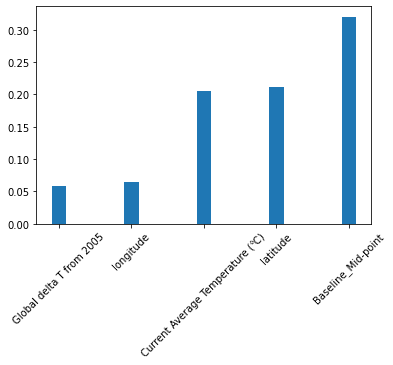

In [19]:
importance = rf_r.feature_importances_
Features = list(df_maize_X.columns.values)
importance = list(importance)
top_5_idx = np.argsort(importance)[-5:]
top_5_f = [Features[i] for i in top_5_idx]
top_5_values = [importance[i] for i in top_5_idx]
print(top_5_f)
plt.bar(top_5_f,top_5_values, width = 0.2)
plt.tick_params(axis='x', which='major', labelsize = 10)
plt.xticks(rotation = 45)
# plt.xlabel("Features",labelpad = 20)
plt.show()

In [20]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, learning_rate=0.3)
xgb_r.fit(X_dev_m, y_dev_m)
print('Train Score:',xgb_r.score(X_dev_m, y_dev_m))
print('Test Score:',xgb_r.score(X_test_m, y_test_m))

Train Score: 0.8896210091396892
Test Score: 0.8740517033738096


####2. Rice

In [21]:
df_rice_X = df_crop_rice.drop(columns=['Climate impacts per ℃ (%)'])
df_rice_y = df_crop_rice['Climate impacts per ℃ (%)']

In [22]:
X_dev, X_test, y_dev, y_test = train_test_split(df_rice_X, df_rice_y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_dev = scaler.fit_transform(X_dev)   # Fit and transform scalar on X_dev
X_test = scaler.transform(X_test)

In [23]:
reg = LinearRegression().fit(X_dev, y_dev)
print('Train Score:',reg.score(X_dev, y_dev))
print('Test Score:',reg.score(X_test, y_test))


Train Score: 0.12483991768321956
Test Score: 0.07089757361080984


In [24]:
reg2 = Ridge(alpha=0.5)
reg2.fit(X_dev, y_dev)
print('Train Score:',reg2.score(X_dev, y_dev))
print('Test Score:',reg2.score(X_test, y_test))

Train Score: 0.12483847445285745
Test Score: 0.07100597143291043


In [25]:
reg3 = SVR(C=1.0, epsilon=0.1)
reg3.fit(X_dev, y_dev)
print('Train Score:',reg3.score(X_dev, y_dev))
print('Test Score:',reg3.score(X_test, y_test))

Train Score: 0.15218372527874735
Test Score: 0.09928868587959716


In [26]:
rf_r = RandomForestRegressor(random_state=0)
rf_r.fit(X_dev, y_dev)
print('Train Score:',rf_r.score(X_dev, y_dev))
print('Test Score:',rf_r.score(X_test, y_test))

Train Score: 0.8624763138159246
Test Score: 0.35288170224296234


['CO2 ppm', 'Current Average Temperature (℃)', 'Baseline_Mid-point', 'longitude', 'latitude']


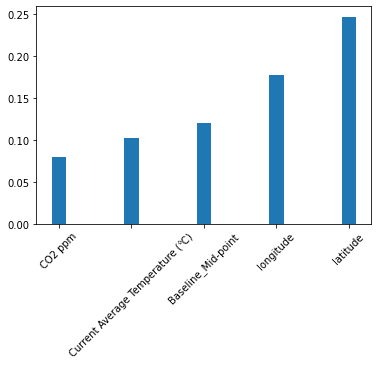

In [27]:
importance = rf_r.feature_importances_
Features = list(df_rice_X.columns.values)
importance = list(importance)
top_5_idx = np.argsort(importance)[-5:]
top_5_f = [Features[i] for i in top_5_idx]
top_5_values = [importance[i] for i in top_5_idx]
print(top_5_f)
plt.bar(top_5_f,top_5_values, width = 0.2)
plt.tick_params(axis='x', which='major', labelsize = 10)
plt.xticks(rotation = 45)
# plt.xlabel("Features",labelpad = 20)
plt.show()

In [28]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, learning_rate=0.3)
xgb_r.fit(X_dev, y_dev)
print('Train Score:',xgb_r.score(X_dev, y_dev))
print('Test Score:',xgb_r.score(X_test, y_test))

Train Score: 0.7944451633595445
Test Score: 0.29983037168138704


####3. Soybean

In [29]:
df_soybean_X = df_crop_soybean.drop(columns=['Climate impacts per ℃ (%)'])
df_soybean_y = df_crop_soybean['Climate impacts per ℃ (%)']

In [30]:
X_dev, X_test, y_dev, y_test = train_test_split(df_soybean_X, df_soybean_y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_dev = scaler.fit_transform(X_dev)   # Fit and transform scalar on X_dev
X_test = scaler.transform(X_test)

In [31]:
reg = LinearRegression().fit(X_dev, y_dev)
print('Train Score:',reg.score(X_dev, y_dev))
print('Test Score:',reg.score(X_test, y_test))


Train Score: 0.42359995239842374
Test Score: 0.334403821452128


In [32]:
reg2 = Ridge(alpha=0.5)
reg2.fit(X_dev, y_dev)
print('Train Score:',reg2.score(X_dev, y_dev))
print('Test Score:',reg2.score(X_test, y_test))

Train Score: 0.4231514700339416
Test Score: 0.32921070094705185


In [33]:
reg3 = SVR(C=1.0, epsilon=0.1)
reg3.fit(X_dev, y_dev)
print('Train Score:',reg3.score(X_dev, y_dev))
print('Test Score:',reg3.score(X_test, y_test))

Train Score: 0.13640965026329033
Test Score: 0.08201576104736907


In [34]:
rf_r = RandomForestRegressor(random_state=0)
rf_r.fit(X_dev, y_dev)
print('Train Score:',rf_r.score(X_dev, y_dev))
print('Test Score:',rf_r.score(X_test, y_test))

Train Score: 0.9876399172739057
Test Score: 0.923188531123103


['longitude', 'Current Average Temperature (℃)', 'Baseline_Mid-point', 'latitude', 'CO2 ppm']


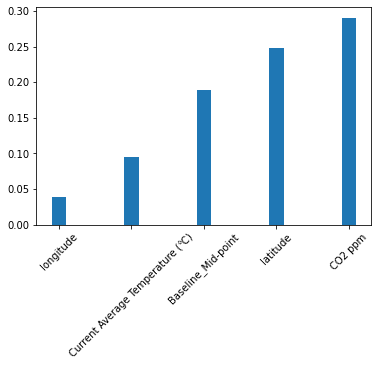

In [35]:
importance = rf_r.feature_importances_
Features = list(df_soybean_X.columns.values)
importance = list(importance)
top_5_idx = np.argsort(importance)[-5:]
top_5_f = [Features[i] for i in top_5_idx]
top_5_values = [importance[i] for i in top_5_idx]
print(top_5_f)
plt.bar(top_5_f,top_5_values, width = 0.2)
plt.tick_params(axis='x', which='major', labelsize = 10)
plt.xticks(rotation = 45)
# plt.xlabel("Features",labelpad = 20)
plt.show()

In [36]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, learning_rate=0.3)
xgb_r.fit(X_dev, y_dev)
print('Train Score:',xgb_r.score(X_dev, y_dev))
print('Test Score:',xgb_r.score(X_test, y_test))

Train Score: 0.9949735277078774
Test Score: 0.9449389378945564


####4. Wheat

In [37]:
df_wheat_X = df_crop_wheat.drop(columns=['Climate impacts per ℃ (%)'])
df_wheat_y = df_crop_wheat['Climate impacts per ℃ (%)']

In [38]:
X_dev, X_test, y_dev, y_test = train_test_split(df_wheat_X, df_wheat_y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_dev = scaler.fit_transform(X_dev)   # Fit and transform scalar on X_dev
X_test = scaler.transform(X_test)

In [39]:
reg = LinearRegression().fit(X_dev, y_dev)
print('Train Score:',reg.score(X_dev, y_dev))
print('Test Score:',reg.score(X_test, y_test))


Train Score: 0.2826804078145976
Test Score: 0.27760165463142383


In [40]:
reg2 = Ridge(alpha=0.5)
reg2.fit(X_dev, y_dev)
print('Train Score:',reg2.score(X_dev, y_dev))
print('Test Score:',reg2.score(X_test, y_test))

Train Score: 0.2826797067099921
Test Score: 0.27755243400661544


In [41]:
reg3 = SVR(C=1.0, epsilon=0.1)
reg3.fit(X_dev, y_dev)
print('Train Score:',reg3.score(X_dev, y_dev))
print('Test Score:',reg3.score(X_test, y_test))

Train Score: 0.3109645863469399
Test Score: 0.27245372995003225


In [42]:
rf_r = RandomForestRegressor(random_state=0)
rf_r.fit(X_dev, y_dev)
print('Train Score:',rf_r.score(X_dev, y_dev))
print('Test Score:',rf_r.score(X_test, y_test))

Train Score: 0.9827903739900681
Test Score: 0.9189587631964402


['CO2 ppm', 'longitude', 'Current Average Temperature (℃)', 'latitude', 'Baseline_Mid-point']


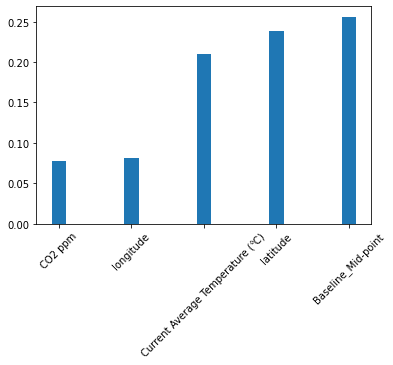

In [43]:
importance = rf_r.feature_importances_
Features = list(df_soybean_X.columns.values)
importance = list(importance)
top_5_idx = np.argsort(importance)[-5:]
top_5_f = [Features[i] for i in top_5_idx]
top_5_values = [importance[i] for i in top_5_idx]
print(top_5_f)
plt.bar(top_5_f,top_5_values, width = 0.2)
plt.tick_params(axis='x', which='major', labelsize = 10)
plt.xticks(rotation = 45)
# plt.xlabel("Features",labelpad = 20)
plt.show()

In [44]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, learning_rate=0.3)
xgb_r.fit(X_dev, y_dev)
print('Train Score:',xgb_r.score(X_dev, y_dev))
print('Test Score:',xgb_r.score(X_test, y_test))

Train Score: 0.9359752829804191
Test Score: 0.8769772740034452
